In [1]:
import pandas as pd
from textblob import TextBlob
from tqdm import tqdm

import pandas as pd

# Leer el archivo parquet usando la ruta relativa
df = pd.read_parquet('../data/Starbucks_reviews_ETL_limpio.parquet')

# Mostrar las primeras filas del dataframe para verificar que se ha leído correctamente
print(df.head())

                     user_id             name                date  rating  \
28071  100107003653040726165   Jacob McCalpin 2017-09-21 09:22:11       5   
28072  108921061266588850634           Alex Z 2018-10-03 12:11:08       2   
28073  115087327175786879005   James Drummond 2019-05-06 01:42:12       1   
28074  103797448577708424762  Matthew Pearson 2019-04-19 12:10:35       1   
28075  104674782787422072897       Craig Winn 2018-08-19 00:06:29       5   

                                                    text  \
28071  Chanel is the greatest barista of all time. I'...   
28072  The food is always warm and delicious but the ...   
28073  The location is a franchise of sorts operated ...   
28074  Go to the one in Sterne. This place is a mess....   
28075                       Open early and well staffed.   

                                     gmap_id  
28071  0x88891beed225fed1:0x3c63ad3e69972d22  
28072  0x88891beed225fed1:0x3c63ad3e69972d22  
28073  0x88891beed225fed1:0x3c63ad3

In [5]:
# Contar el número de valores nulos en la columna 'text'
null_text_count = df['text'].isnull().sum()
print('Número de valores nulos en la columna "text":', null_text_count)

Número de valores nulos en la columna "text": 81691


In [6]:
# Eliminar todas las filas con valores nulos en la columna "text"
df_text = df.dropna(subset=['text'])
print('Se han eliminado las filas con valores nulos en la columna "text".')
print('Número de filas después de la limpieza:', len(df_text))

Se han eliminado las filas con valores nulos en la columna "text".
Número de filas después de la limpieza: 75038


In [12]:
# Inicializar TQDM para pandas
tqdm.pandas()

# Definir una función para clasificar el sentimiento
def classify_sentiment(text):
    if pd.isna(text):
        return 1  # Treat NaN as Neutral
    analysis = TextBlob(str(text))
    if analysis.sentiment.polarity > 0:
        return 2  # Positive
    elif analysis.sentiment.polarity < 0:
        return 0  # Negative
    else:
        return 1  # Neutral

# Aplicar la función a la columna 'Texto'
df_text['sentiment'] = df_text['text'].progress_apply(classify_sentiment)

# Mostrar un head del dataframe para mostrar la nueva columna
df.head()

100%|██████████| 75038/75038 [00:10<00:00, 7338.14it/s]
C:\Users\zimme\AppData\Local\Temp\ipykernel_23720\888395923.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text['sentiment'] = df_text['text'].progress_apply(classify_sentiment)


,user_id,name,date,rating,text,gmap_id,sentiment
28071,100107003653040726165,Jacob McCalpin,2017-09-21 09:22:11,5,Chanel is the greatest barista of all time. I'...,0x88891beed225fed1:0x3c63ad3e69972d22,2
28072,108921061266588850634,Alex Z,2018-10-03 12:11:08,2,The food is always warm and delicious but the ...,0x88891beed225fed1:0x3c63ad3e69972d22,0
28073,115087327175786879005,James Drummond,2019-05-06 01:42:12,1,The location is a franchise of sorts operated ...,0x88891beed225fed1:0x3c63ad3e69972d22,0
28074,103797448577708424762,Matthew Pearson,2019-04-19 12:10:35,1,Go to the one in Sterne. This place is a mess....,0x88891beed225fed1:0x3c63ad3e69972d22,0
28075,104674782787422072897,Craig Winn,2018-08-19 00:06:29,5,Open early and well staffed.,0x88891beed225fed1:0x3c63ad3e69972d22,2


In [13]:
# Contar el número de valores nulos en la columna 'text' después de la limpieza
despues_de_limpieza_nulos_texto = df_text['text'].isnull().sum()
print('Número de valores nulos en la columna text después de la limpieza:', despues_de_limpieza_nulos_texto)

Número de valores nulos en la columna text después de la limpieza: 0


In [14]:
df_text.to_parquet('../data/starbucks_reviews_con_sentiment.parquet')

C:\Users\zimme\AppData\Local\Temp\ipykernel_23720\571286956.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df_text, palette='viridis')


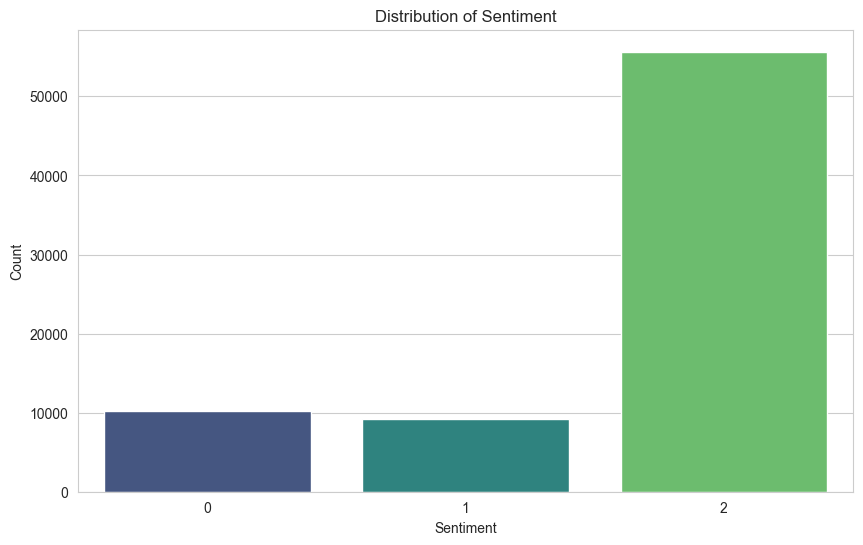

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Count plot for sentiment
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df_text, palette='viridis')
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

Conclusión: Este gráfico confirma las observaciones del box plot, mostrando la densidad de las calificaciones para cada tipo de sentimiento. Las reseñas positivas (2) tienen una alta densidad de calificaciones altas, mientras que las reseñas negativas (0) tienen una alta densidad de calificaciones bajas. Las reseñas neutrales (1) muestran una distribución más dispersa de calificaciones.

C:\Users\zimme\AppData\Local\Temp\ipykernel_23720\137970689.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='rating', data=df_text, palette='viridis')


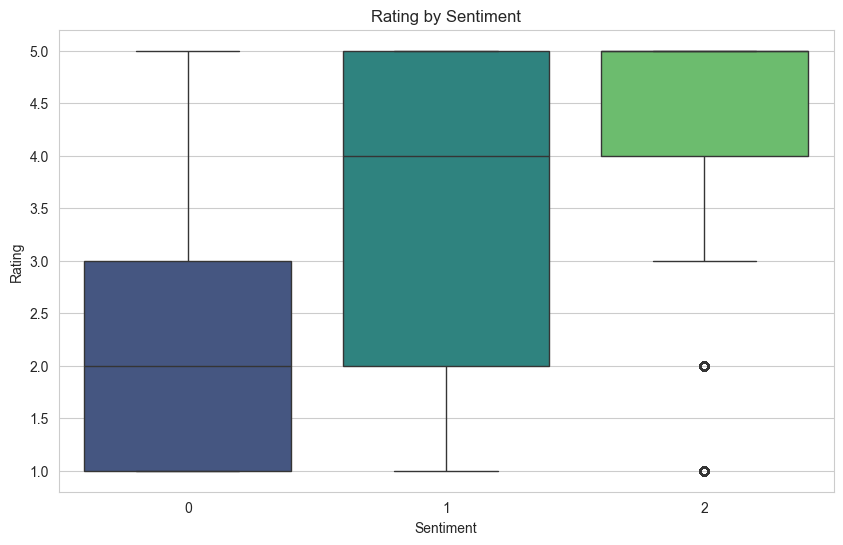

In [18]:
# Box plot for rating by sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='rating', data=df_text, palette='viridis')
plt.title('Rating by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Rating')
plt.show()


- Conclusión: La mayoría de las reseñas tienen un sentimiento positivo (2), seguido por las reseñas neutrales (1) y finalmente las reseñas negativas (0). Esto sugiere que, en general, los clientes tienen una percepción positiva de Starbucks.

C:\Users\zimme\AppData\Local\Temp\ipykernel_23720\4206347194.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='sentiment', y='rating', data=df_text, palette='viridis')


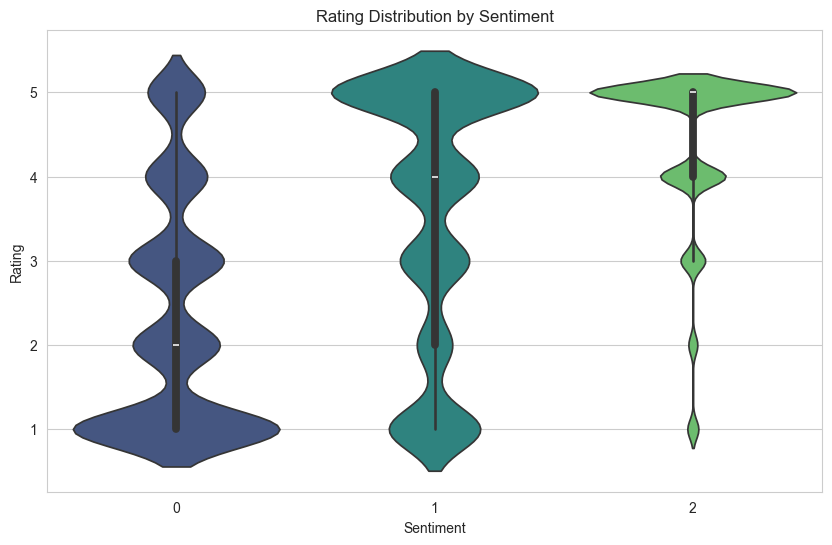

In [19]:
# Violin plot for rating by sentiment
plt.figure(figsize=(10, 6))
sns.violinplot(x='sentiment', y='rating', data=df_text, palette='viridis')
plt.title('Rating Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Rating')
plt.show()

Conclusión: Las calificaciones varían significativamente según el sentimiento. Las reseñas con sentimiento positivo (2) tienden a tener calificaciones más altas, mientras que las reseñas negativas (0) tienen calificaciones más bajas. Las reseñas neutrales (1) tienen una distribución de calificaciones más amplia, pero generalmente se encuentran en el rango medio.

<Figure size 1500x1000 with 0 Axes>

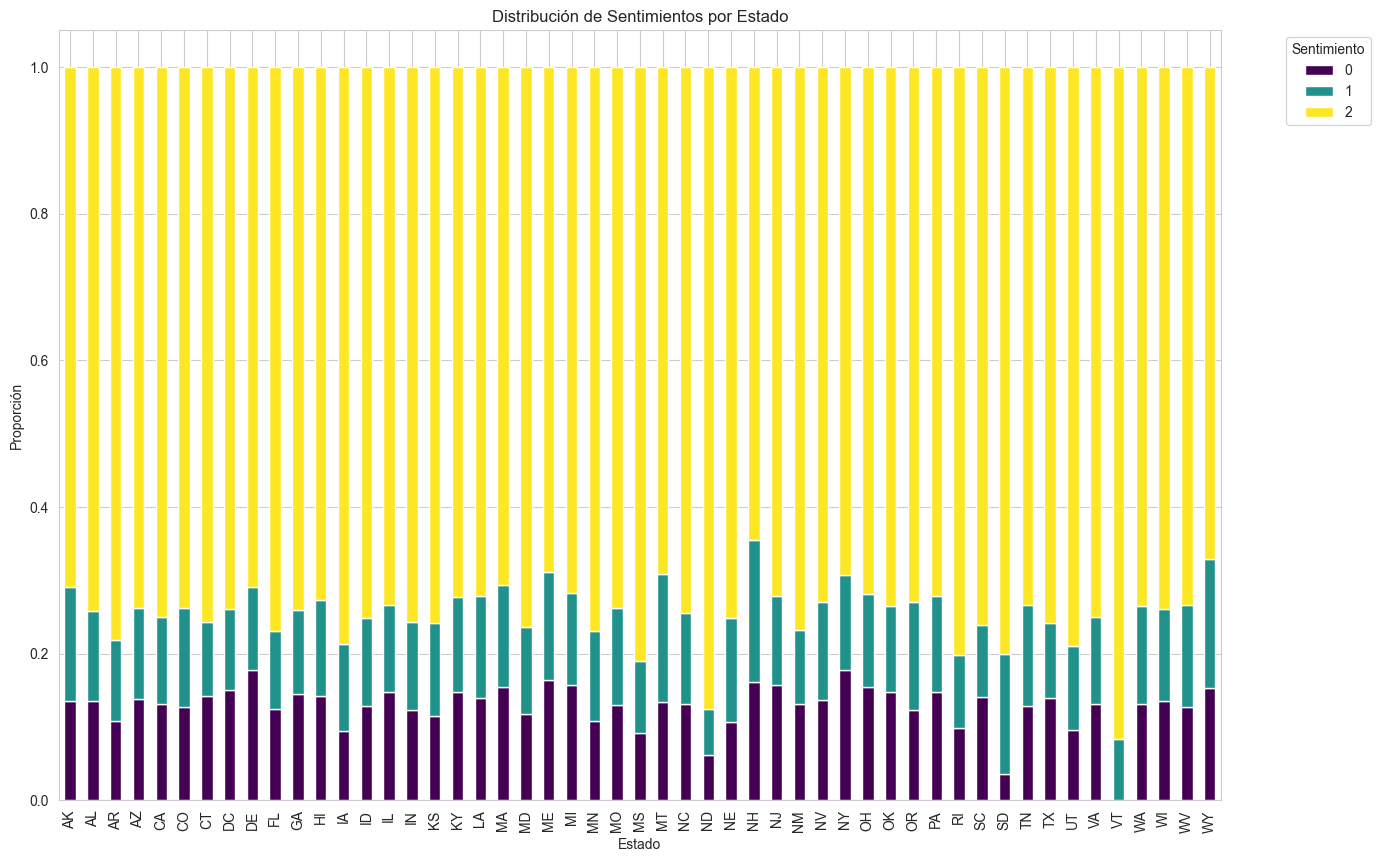

In [20]:
# Cargar los dataframes desde los archivos parquet
df = pd.read_parquet('../data/starbucks_reviews_con_sentiment.parquet')
df1 = pd.read_parquet('../data/Starbucks_metadata_ETL_limpio.parquet')

# Unir los dataframes en una columna común (asumiendo que 'gmap_id' es la columna común)
df_unido = pd.merge(df, df1, on='gmap_id')

# Agrupar por estado y sentimiento para obtener el conteo de cada sentimiento por estado
conteo_sentimientos_estado = df_unido.groupby(['state', 'sentiment']).size().unstack(fill_value=0)

# Normalizar los conteos para obtener la proporción de cada sentimiento por estado
proporciones_sentimientos_estado = conteo_sentimientos_estado.div(conteo_sentimientos_estado.sum(axis=1), axis=0)

# Graficar la distribución de sentimientos por estado
plt.figure(figsize=(15, 10))
proporciones_sentimientos_estado.plot(kind='bar', stacked=True, colormap='viridis', figsize=(15, 10))
plt.title('Distribución de Sentimientos por Estado')
plt.xlabel('Estado')
plt.ylabel('Proporción')
plt.legend(title='Sentimiento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [21]:
print(proporciones_sentimientos_estado)

sentiment         0         1         2
state                                  
AK         0.135447  0.155620  0.708934
AL         0.135246  0.122951  0.741803
AR         0.107774  0.111307  0.780919
AZ         0.138161  0.123463  0.738375
CA         0.131120  0.119059  0.749821
CO         0.127595  0.135145  0.737259
CT         0.141714  0.101714  0.756571
DC         0.151099  0.109890  0.739011
DE         0.178138  0.113360  0.708502
FL         0.125021  0.105471  0.769508
GA         0.145362  0.114253  0.740385
HI         0.142680  0.130273  0.727047
IA         0.095012  0.118765  0.786223
ID         0.128686  0.119303  0.752011
IL         0.148285  0.118359  0.733356
IN         0.123055  0.120226  0.756719
KS         0.114914  0.127139  0.757946
KY         0.148148  0.128540  0.723312
LA         0.139344  0.139344  0.721311
MA         0.154896  0.138844  0.706260
MD         0.117752  0.118644  0.763604
ME         0.163462  0.147436  0.689103
MI         0.157824  0.124458  0.717718
